<a href="https://colab.research.google.com/github/MohitPunasiya/Contests/blob/main/datathon_dphi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip '/content/drive/MyDrive/weather (1).zip'  #unzipping the file 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
y_df = pd.read_csv('/content/Training_set.csv') 

In [ ]:
y_df.head()

,filename,label
0,Image_1.jpg,sunrise
1,Image_2.jpg,shine
2,Image_3.jpg,cloudy
3,Image_4.jpg,shine
4,Image_5.jpg,sunrise


In [ ]:
image_ids = os.listdir('train') #getting image file names
print(image_ids , '\n', len(image_ids))

['Image_287.jpg', 'Image_786.jpg', 'Image_597.jpg', 'Image_948.jpg', 'Image_643.jpg', 'Image_384.jpg', 'Image_35.jpg', 'Image_53.jpg', 'Image_633.jpg', 'Image_222.jpg', 'Image_170.jpg', 'Image_1017.jpg', 'Image_910.jpg', 'Image_578.jpg', 'Image_194.jpg', 'Image_110.jpg', 'Image_1042.jpg', 'Image_790.jpg', 'Image_961.jpg', 'Image_3.jpg', 'Image_513.jpg', 'Image_929.jpg', 'Image_647.jpg', 'Image_612.jpg', 'Image_376.jpg', 'Image_286.jpg', 'Image_933.jpg', 'Image_543.jpg', 'Image_897.jpg', 'Image_551.jpg', 'Image_600.jpg', 'Image_976.jpg', 'Image_799.jpg', 'Image_618.jpg', 'Image_91.jpg', 'Image_479.jpg', 'Image_530.jpg', 'Image_838.jpg', 'Image_868.jpg', 'Image_627.jpg', 'Image_645.jpg', 'Image_559.jpg', 'Image_888.jpg', 'Image_891.jpg', 'Image_2.jpg', 'Image_129.jpg', 'Image_264.jpg', 'Image_425.jpg', 'Image_365.jpg', 'Image_118.jpg', 'Image_1031.jpg', 'Image_900.jpg', 'Image_293.jpg', 'Image_206.jpg', 'Image_357.jpg', 'Image_364.jpg', 'Image_40.jpg', 'Image_1.jpg', 'Image_250.jpg', 'Im

In [ ]:
print(y_df[y_df['filename']=='Image_287.jpg']['label'].values[0])

rainy


In [ ]:
data = []
for image_id in image_ids:
  data.append((y_df[y_df['filename']==image_id]['label'].values[0],'/content/train'+'/'+image_id)) #saving file paths

In [ ]:
data

In [ ]:
weather_df = pd.DataFrame(data=data,columns=['weather','image_path']) #saving filepath with image id

In [ ]:
weather_df

,weather,image_path
0,rainy,/content/train/Image_287.jpg
1,sunrise,/content/train/Image_786.jpg
2,foggy,/content/train/Image_597.jpg
3,sunrise,/content/train/Image_948.jpg
4,sunrise,/content/train/Image_643.jpg
...,...,...
1043,cloudy,/content/train/Image_650.jpg
1044,sunrise,/content/train/Image_390.jpg
1045,rainy,/content/train/Image_803.jpg
1046,foggy,/content/train/Image_781.jpg


In [ ]:
weather_df.value_counts('weather')

weather
sunrise    245
cloudy     210
foggy      210
rainy      209
shine      174
dtype: int64

In [ ]:
images = []   #image transformation and storing
labels = []
im_size = 224
import cv2
for wthr,img_path in weather_df.values:
  labels.append(wthr)
  img = cv2.imread(img_path)  
  img = cv2.resize(img,(im_size,im_size)) #image resize
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #image cvt coloring
  images.append(img) #appending to image list

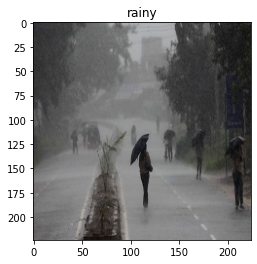

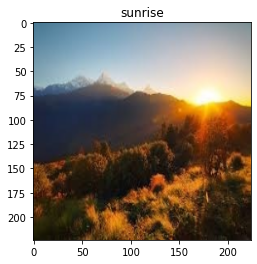

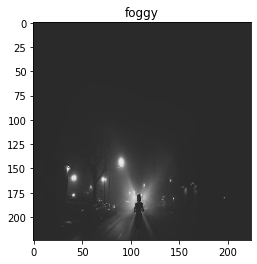

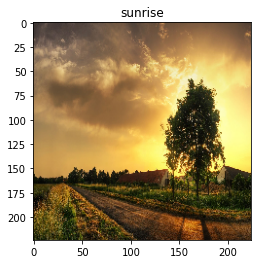

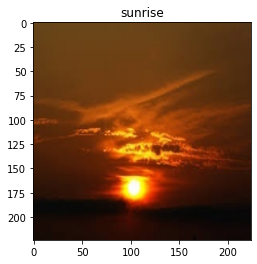

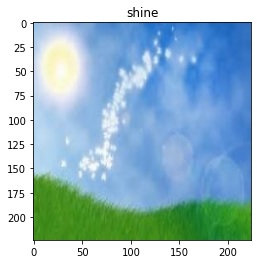

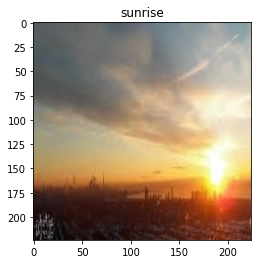

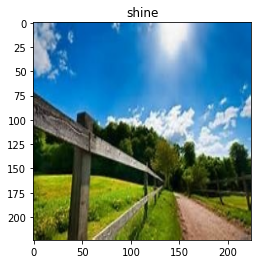

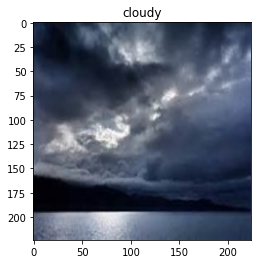

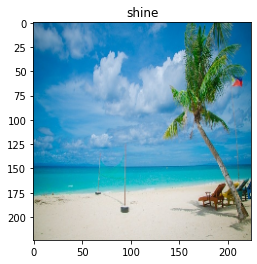

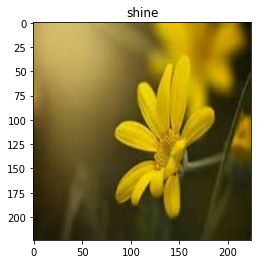

In [ ]:
count =0 #code snippet to show image
for i,j in  zip(images,labels):
    plt.imshow((i))
    plt.title(j)
    plt.show()
    if count==10:
        break
    count+=1

In [ ]:
images = np.array(images) 
images.shape

(1048, 224, 224, 3)

In [ ]:
np.array(labels).shape

(1048,)

In [ ]:
y = pd.get_dummies(np.array(labels)).values #One hot encoding of labels

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=12) #spitting data into training and testing part set

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(838, 224, 224, 3)
(838, 5)
(210, 224, 224, 3)
(210, 5)


In [ ]:
#importing all needed dependencies
import numpy as np
from keras import layers
from keras.layers import Input,Add,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from keras.models import Model,load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from scipy.sparse import csr_matrix
from tensorflow.keras import regularizers

##model - resnet 50

In [ ]:
def identity_block(X, f, filters): 
  # Retrieve Fitters 
  Fl, F2, F3 = filters 
  X_shortcut = X 
# First Layer 
  X = Conv2D(filters = Fl, kernel_size = (1, 1), strides = (1,1), padding = 'valid',kernel_regularizer= regularizers.l2(l=0.01))(X) 
  X = BatchNormalization(axis = 3)(X) 
  X = Activation('relu')(X) 
# Second layer 
  X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same',kernel_regularizer= regularizers.l2(l=0.01))(X) 
  X = BatchNormalization(axis = 3)(X) 
  X = Activation('relu')(X) 
# Third Layer 
  X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid',kernel_regularizer= regularizers.l2(l=0.01))(X) 
  X = BatchNormalization(axis=3)(X)
  # FinaL step: Add shortcut vaLue to F(X), and pass it through a RELU activation 
  X = Add()([X, X_shortcut]) 
  X = Activation('relu')(X) 
  return X

In [ ]:
def convolutional_block(X, f, filters, s = 2): 
# Retrieve Fitters 
  F1, F2, F3 = filters 

  X_shortcut =X

# First Layer 
  X = Conv2D(F1, (1, 1), strides = (s,s))(X)    # 1,1 is fitter size 
  X = BatchNormalization(axis = 3)(X)           # normaLization on channeLs X = Activation('relu')(X) 

# Second Layer (f,f)=3*3 filter by defauLt 
  X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same',kernel_regularizer= regularizers.l2(l=0.01))(X) 
  X = BatchNormalization(axis = 3)(X) 
  X = Activation('relu')(X) 

# Third Layer 
  X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid',kernel_regularizer= regularizers.l2(l=0.01))(X) 
  X = BatchNormalization(axis = 3)(X) 

                                                                    ##### SHORTCUT PATH #### 
  X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s),padding = 'valid',kernel_regularizer= regularizers.l2(l=0.01))(X_shortcut) 
  X_shortcut = BatchNormalization(axis = 3)(X_shortcut)
  #final step add short value here, and pass it through a RELU activation

  X = Add()([X,X_shortcut])
  X = Activation('relu')(X)
  return X


In [ ]:
def ResNet50(input_shape=(im_size,im_size,3),classes=5):
  X_input = Input(input_shape)
  # Zero-Padding 
  X = ZeroPadding2D((3, 3))(X_input) #3,3 padding 
  
  # Stage 1 
  X = Conv2D(64, (7, 7), strides=(2, 2))(X) 
  X = BatchNormalization(axis=3)(X) 
  X = Activation('relu')(X) 
  X = MaxPooling2D((3,3), strides=(2, 2))(X) 

  # Stage 2 
  X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)


  X = identity_block(X, 3, [64, 64, 256]) 

  X = identity_block(X, 3, [64, 64, 256]) 

  # Stage 3 
  X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2) 
  X = identity_block(X, 3, [128, 128, 512]) 
  X = identity_block(X, 3, [128, 128, 512]) 
  
 
  # Stage 4
  X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2) 
  X = identity_block(X, 3,[256, 256, 1024]) 
  
  #stage 5
  X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2) 
  X = identity_block(X, 3,[512, 512, 2048]) 
  X = identity_block(X, 3,[512, 512, 2048]) 
  X = identity_block(X, 3,[512, 512, 2048]) 
  X = identity_block(X, 3,[512, 512, 2048]) 
  
   
  
  
  #avg_pooling
  X = AveragePooling2D((2,2),name='avg_pool')(X)

  #End code here
  X = Flatten()(X)
  X = Dense(classes,activation='softmax',name='fc' + str(classes),kernel_initializer=glorot_uniform(seed=0))(X)
  #Create model
  model = Model(inputs=X_input,outputs=X,name='ResNet50')
  
  return model 



In [ ]:
model = ResNet50(input_shape=(224,224,3),classes=5)

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_5 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_6[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_220 (Conv2D)            (None, 112, 112, 64  9472        ['zero_padding2d_5[0][0]']       
                                )                                                          

##model training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=15)

In [ ]:
import keras
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=30,callbacks=[model_checkpoint_callback])
#model training

Epoch 1/50
28/28 [==============================] - 14s 328ms/step - loss: 186.1400 - accuracy: 0.3258 - val_loss: 367.7815 - val_accuracy: 0.2048
Epoch 2/50
28/28 [==============================] - 8s 274ms/step - loss: 163.8449 - accuracy: 0.5203 - val_loss: 263.4845 - val_accuracy: 0.1952
Epoch 3/50
28/28 [==============================] - 8s 291ms/step - loss: 160.7442 - accuracy: 0.5883 - val_loss: 158.9797 - val_accuracy: 0.3952
Epoch 4/50
28/28 [==============================] - 8s 275ms/step - loss: 158.8276 - accuracy: 0.6098 - val_loss: 157.7475 - val_accuracy: 0.3333
Epoch 5/50
28/28 [==============================] - 8s 282ms/step - loss: 156.7619 - accuracy: 0.5931 - val_loss: 155.6303 - val_accuracy: 0.3952
Epoch 6/50
28/28 [==============================] - 8s 281ms/step - loss: 154.2986 - accuracy: 0.6718 - val_loss: 153.9433 - val_accuracy: 0.3667
Epoch 7/50
28/28 [==============================] - 8s 287ms/step - loss: 152.9886 - accuracy: 0.6480 - val_loss: 152.1814 

##training visualisation

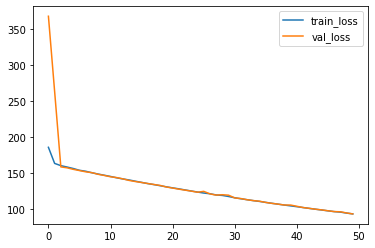

In [ ]:
metrics = pd.DataFrame(model.history.history)
plt.plot(metrics['loss'],label='train_loss')
plt.plot(metrics['val_loss'],label='val_loss')
plt.legend()

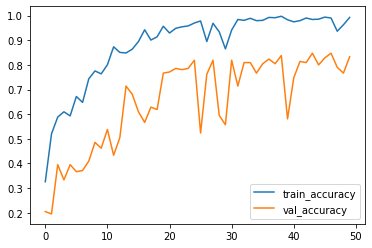

In [ ]:
plt.plot(metrics['accuracy'],label='train_accuracy')
plt.plot(metrics['val_accuracy'],label='val_accuracy')
plt.legend()

##predicting on best model

In [ ]:
model_for_test = keras.models.load_model('/content/drive/MyDrive/weights.50-82.99.h5') #this is the best model from checkpoints

In [ ]:
model.evaluate(X_test,y_test) #trained model vs best checkpoint model
model_for_test.evaluate(X_test,y_test)

7/7 [==============================] - 2s 87ms/step - loss: 82.9864 - accuracy: 0.8619


[82.98635864257812, 0.8619047403335571]

#test set transformation

In [ ]:
#test data transformation
image_ids = os.listdir('test')
test_img = []
im_size = 224
for img_id in image_ids:
  img_path = '/content/test' + '/' + img_id
  img = cv2.imread(img_path)
  img = cv2.resize(img,(im_size,im_size))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  test_img.append(img)

In [ ]:
preds = model.predict(np.array(test_img))

In [ ]:
preds = pd.DataFrame(preds,columns = ['cloudy','foggy','rainy','shine','sunrise']) #dummy to label

In [ ]:
preds['label'] = preds.idxmax(axis=1)

In [ ]:
preds['filename'] = image_ids

In [ ]:
preds['sorted'] = preds['filename'].apply(lambda x : int(x[6:-4]))

In [ ]:
final_preds = preds.sort_values('sorted')[['filename','label']] 

In [ ]:
final_preds.to_csv('/content/drive/MyDrive/pred4.csv', index = False) #downloading predicted values